In [1]:
!pip install spectral

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.9/212.9 kB 4.1 MB/s eta 0:00:00a 0:00:01


In [15]:
import spectral.io.envi as envi

# Provide the path to the .hdr file (it should be in the same directory as the .raw file)
hdr_file = "/kaggle/input/icvl-data/4cam_0411-1640-1.hdr"

# Load the dataset
img = envi.open(hdr_file)
hdr = envi.open(hdr_file).metadata
wavelengths = hdr.get('wavelength', None)

#convert to array
data = img.load()

# Check the shape
print(data.shape)  # (rows, cols, bands)
print(wavelengths)

(1304, 1392, 519)
['390.66', '391.85', '393.05', '394.25', '395.45', '396.65', '397.84', '399.04', '400.24', '401.44', '402.64', '403.84', '405.04', '406.24', '407.44', '408.64', '409.84', '411.04', '412.25', '413.45', '414.65', '415.85', '417.05', '418.26', '419.46', '420.66', '421.87', '423.07', '424.27', '425.48', '426.68', '427.89', '429.09', '430.30', '431.50', '432.71', '433.91', '435.12', '436.32', '437.53', '438.74', '439.94', '441.15', '442.36', '443.57', '444.77', '445.98', '447.19', '448.40', '449.61', '450.82', '452.02', '453.23', '454.44', '455.65', '456.86', '458.07', '459.28', '460.50', '461.71', '462.92', '464.13', '465.34', '466.55', '467.77', '468.98', '470.19', '471.40', '472.62', '473.83', '475.04', '476.26', '477.47', '478.69', '479.90', '481.12', '482.33', '483.55', '484.76', '485.98', '487.19', '488.41', '489.63', '490.84', '492.06', '493.28', '494.50', '495.71', '496.93', '498.15', '499.37', '500.59', '501.81', '503.03', '504.25', '505.46', '506.68', '507.90', '

In [17]:
import numpy as np

flattened_data = data.reshape(-1, 519)

y_min, y_max = flattened_data.min(), flattened_data.max()

normalized_data = (flattened_data - y_min) / (y_max - y_min)

In [18]:
#downsample from 519 wavelengths to 128 wavelengths

# Trim the last few wavelengths to make 519 evenly divisible by 4
num_wavelengths = 519
target_wavelengths = 128
trim_size = num_wavelengths - (target_wavelengths * 4)

# Remove the last 'trim_size' columns
data_trimmed = normalized_data[:, :-trim_size] if trim_size > 0 else normalized_data

# Reshape and compute the mean over every 4 consecutive wavelengths
data_downsampled = data_trimmed.reshape(normalized_data.shape[0], target_wavelengths, 4).mean(axis=2)

print(data_downsampled.shape)  # Should be (1815168, 128)

(1815168, 128)


In [19]:
wavelengths = [float(w) for w in wavelengths]

# Trim to make the length evenly divisible by 4
num_wavelengths = 519
target_wavelengths = 128
trim_size = num_wavelengths - (target_wavelengths * 4)

# Remove last 'trim_size' elements if needed
if trim_size > 0:
    wavelengths = wavelengths[:-trim_size]

# Compute the mean of every 4 wavelengths
wavelengths_downsampled = [
    round(sum(wavelengths[i:i+4]) / 4, 2) for i in range(0, len(wavelengths), 4)
]

print(len(wavelengths_downsampled))  # New list of 128 averaged wavelengths

128


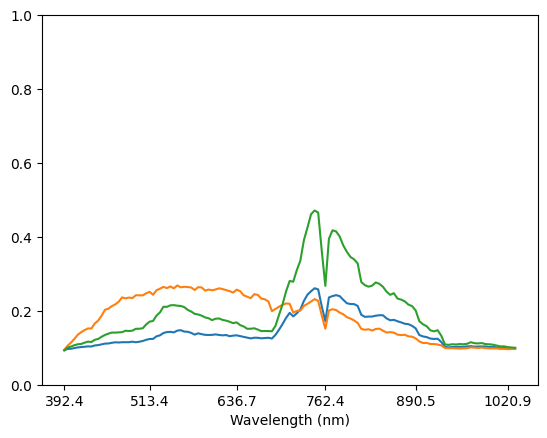

In [28]:
import random
import matplotlib.pyplot as plt

ticks = wavelengths_downsampled[::25]

for i in range(3):
    index = random.randint(0, data_downsampled.shape[0] - 1)
    plt.plot(wavelengths_downsampled, data_downsampled[index, :])

plt.xticks(ticks)
plt.ylim(0,1)
plt.xlabel("Wavelength (nm)");

In [22]:
indices = [random.randint(0, data_downsampled.shape[0] - 1) for i in range(50000)]
icvl_pixel_data = data_downsampled[indices, :]
print(icvl_pixel_data.shape)

(50000, 128)


In [23]:
np.save("icvl_pixel_data", icvl_pixel_data)
np.save("icvl_wavelengths", wavelengths_downsampled)